# House Prices: Advanced Regression Techniques

## Import packages

In [3]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load dataset

In [11]:
#read data
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [12]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Find correlation


<AxesSubplot:>

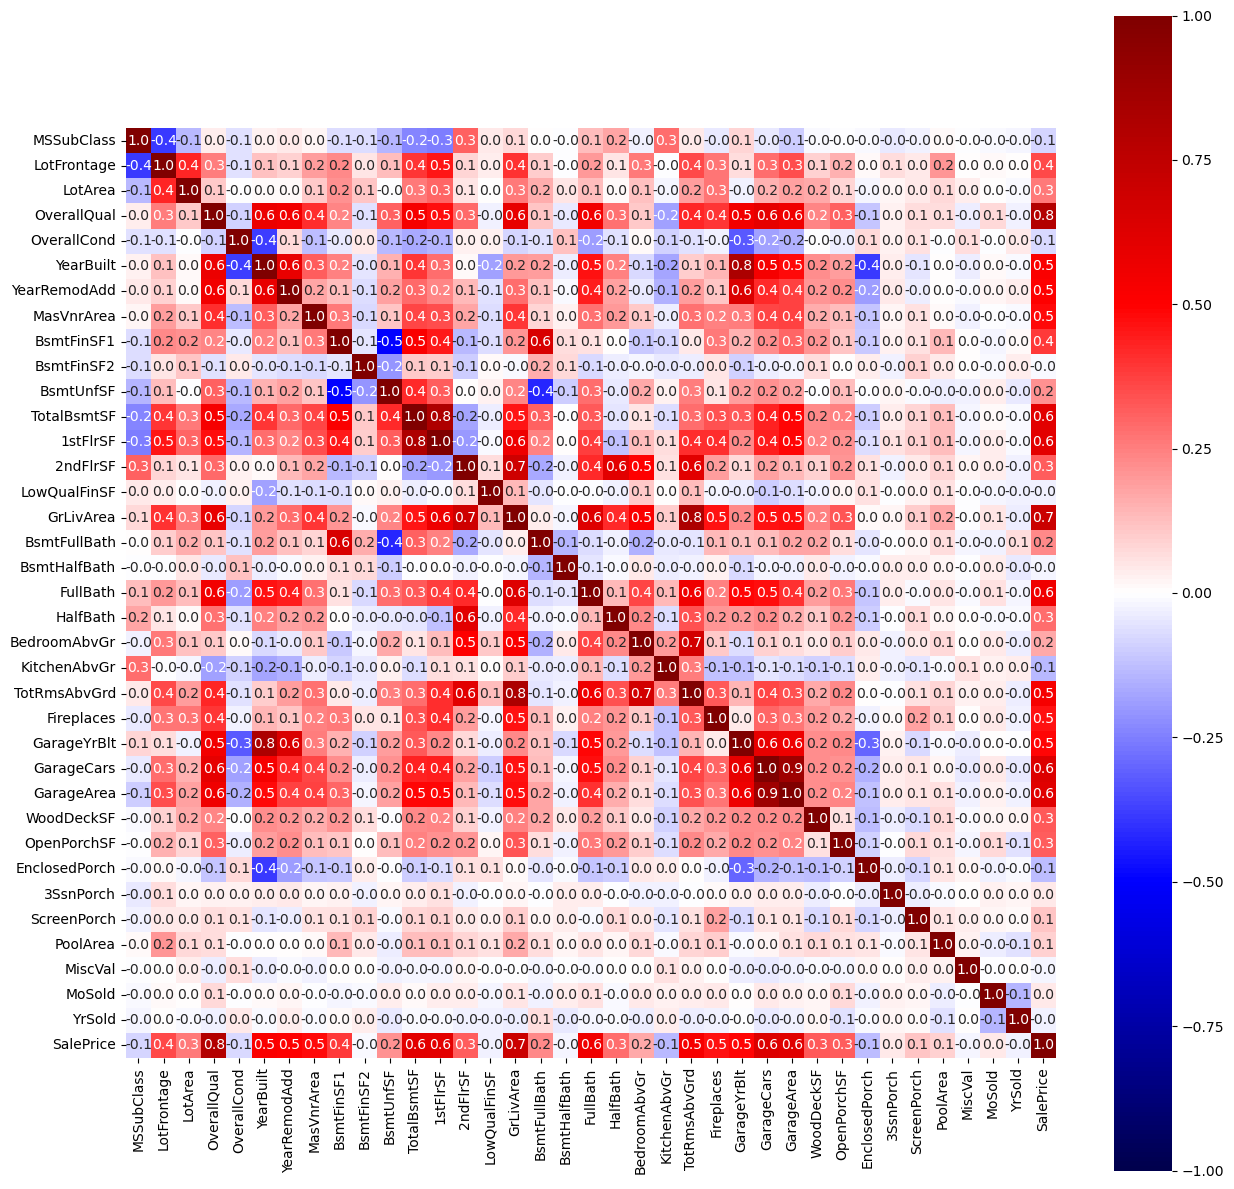

In [7]:
plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f',square = True)

#We can find OverallQual, BsmtFinSF,1stFlrSF... have positive correlation with SalesPrice

## Feature Engineering - Log transformation

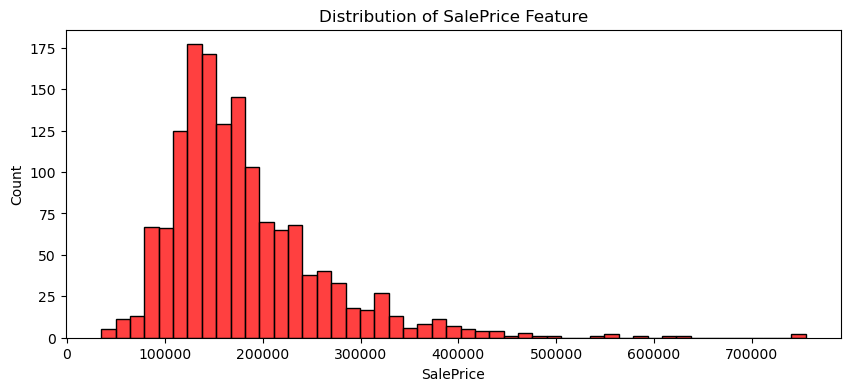

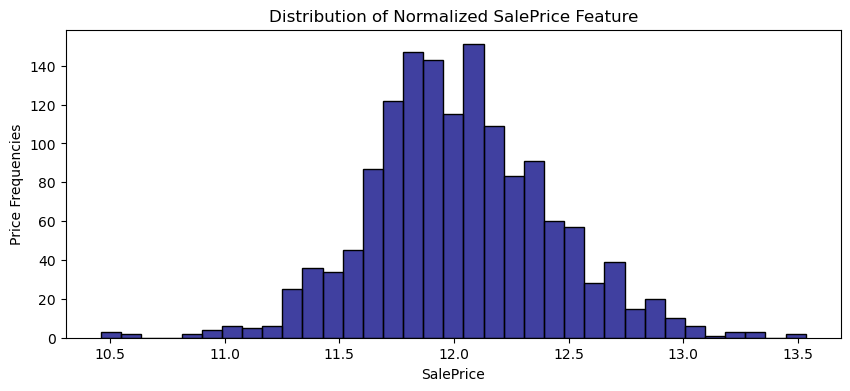

In [13]:
f, ax = plt.subplots(figsize=(10,4))
sns.histplot(train['SalePrice'], color="red")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of SalePrice Feature")
plt.show()

train['SalePrice'] = np.log1p(train['SalePrice'])

f, ax = plt.subplots(figsize=(10,4))
sns.histplot(train['SalePrice'], color="navy")
ax.set(ylabel="Price Frequencies")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of Normalized SalePrice Feature")
plt.show()

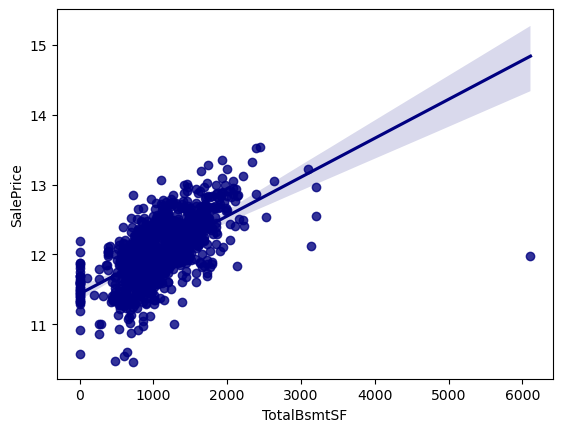

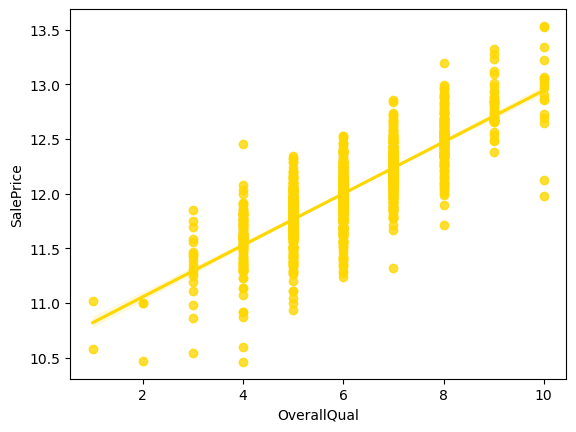

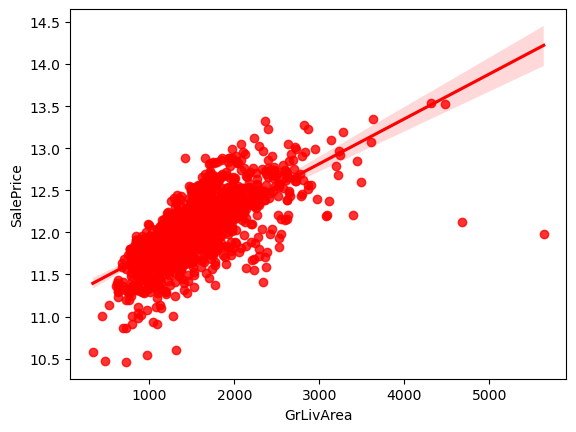

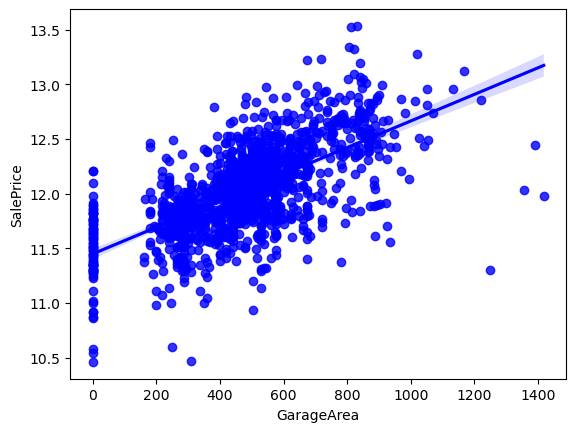

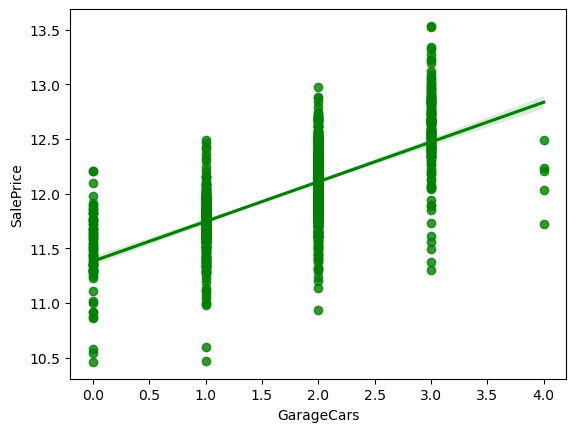

In [14]:
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', color = 'navy', data = train)
plt.show()
sns.regplot(x = 'OverallQual', y = 'SalePrice', color = 'gold', data = train)
plt.show()
sns.regplot(x = 'GrLivArea', y = 'SalePrice', color = 'red', data = train)
plt.show()
sns.regplot(x = 'GarageArea', y = 'SalePrice', color = 'blue', data = train)
plt.show()
sns.regplot(x = 'GarageCars', y = 'SalePrice', color = 'green', data = train)
plt.show()

In [15]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
df_new = pd.concat((train, test)).reset_index(drop=True)
df_new.drop(['SalePrice'], axis=1, inplace=True)

## Feature Engineering - Handing missing value

Text(0.5, 1.0, 'Features with the highest percentage of Nan values')

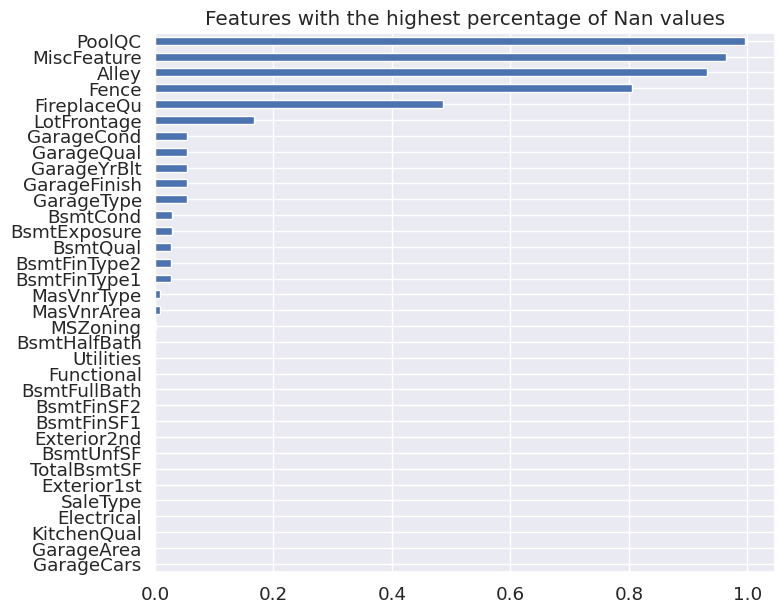

In [18]:
### Handing missing value

#print(df_new.describe(include = 'all'))
col_nan = df_new.isna().sum() / df_new.shape[0]
col_nan.sort_values(inplace = True)
plt.figure(figsize=(8, 7))
sns.set(font_scale=1.2)
col_nan[col_nan > 0].plot(kind = "barh")
plt.title("Features with the highest percentage of Nan values")

In [19]:
def Data_clean(data):
    # Change data types in numerical features that should be categorical
    data['MSSubClass'] = data['MSSubClass'].apply(str)
    data['OverallCond'] = data['OverallCond'].astype(str)
    data['YrSold'] = data['YrSold'].astype(str)
    data['MoSold'] = data['MoSold'].astype(str)

    #Handle missing value
    data["PoolQC"] = data["PoolQC"].fillna("None")
    data["MiscFeature"] = data["MiscFeature"].fillna("NA")
    data["FireplaceQu"] = data["FireplaceQu"].fillna("NA")
    data["MasVnrType"] = data["MasVnrType"].fillna("None")
    data["Fence"] = data["Fence"].fillna("NA")
    data['MSSubClass'] = data['MSSubClass'].fillna("None")
    data["Alley"] = data["Alley"].fillna("NA")
    data = data.drop(['Utilities'], axis=1)

    #Fill object data with mode #data['XXX'].mode()[0]
    data["Functional"] = data["Functional"].fillna("Typ") # Typical Functionality
    data['Electrical'] = data['Electrical'].fillna("SBrkr") # Standard Circuit Breakers & Romex
    data['KitchenQual'] = data['KitchenQual'].fillna("TA") # Typical/Average
    data['Exterior1st'] = data['Exterior1st'].fillna("VinylSd") # Vinyl Siding
    data['Exterior2nd'] = data['Exterior2nd'].fillna("VinylSd") # Vinyl Siding
    data['SaleType'] = data['SaleType'].fillna("WD") # Warranty Deed - Conventional
    data['MSZoning'] = data['MSZoning'].fillna("RL") # Residential Low Density

    data["MasVnrArea"] = data["MasVnrArea"].fillna(0)
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        data[col] = data[col].fillna(0)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        data[col] = data[col].fillna('None')

    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        data[col] = data[col].fillna(0)   
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data[col] = data[col].fillna('None')   


    data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


    # Replace left features missing values with None
    objects = []
    for i in data.columns:
        if data[i].dtype == object:
            objects.append(i)
    data.update(data[objects].fillna('None'))

    numeric = []
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for i in data.columns:
        if data[i].dtype in numeric_dtypes:
            numeric.append(i)
    data.update(data[numeric].fillna(0))
    return(data)

## Feature Engineering - Boxcox transformation

In [20]:
def Data_transform(data):
    
    # box cox transform
    numeric_feats = data.dtypes[data.dtypes != "object"].index
    skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    print("\nSkew in numerical features: \n")
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    skewness = skewness[abs(skewness) > 0.75]
    print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
    skewed_features = skewness.index
    lam = 0.15
    for i in skewed_features:
        data[i] = boxcox1p(data[i], lam)
    return(data)


In [21]:
df_new = Data_clean(df_new)
df_new = Data_transform(df_new)
df_new.isnull().sum().sum()


Skew in numerical features: 

There are 32 skewed numerical features to Box Cox transform


0

## Feature Engineering - Encoder

In [22]:
# Label Encoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
le = LabelEncoder()
for i in cols:
    df_new[i] = le.fit_transform(df_new[[i]])
    
# One hot encoder
df_new = pd.get_dummies(df_new)
print(df_new.shape)
train = df_new[:ntrain]
test = df_new[ntrain:]
print(train.shape)
print(test.shape)
df_new.head(10)

(2919, 220)
(1460, 220)
(1459, 220)


,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,5.831,19.212,1,1,3,0,2.440,4,14.188,14.188,8.059,2,4,2,4,3,2,11.170,6,0.000,7.483,11.693,0,1,11.693,11.686,0.000,13.699,0.730,0.000,1.194,0.730,1.541,0.730,2,2.603,6,0.000,3,14.188,2,1.194,10.506,5,5,2,0.000,5.715,0.000,0.000,0.000,0.000,3,4,0.000,4,2,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,

In [23]:
# Regression model

gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=7) 

xgbr = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=7)

ctbr = CatBoostRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       subsample=0.7,
                       silent = True,
                       random_state=7)

lgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=6000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
rfr = RandomForestRegressor(n_estimators=6000,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=7)

## Cross validation

In [28]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1).get_n_splits(train.values)

gbr_mse_cv_scores = - cross_val_score(gbr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
gbr_rmse_score = np.sqrt(gbr_mse_cv_scores)

xgbr_mse_cv_scores = - cross_val_score(xgbr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
xgbr_rmse_score = np.sqrt(xgbr_mse_cv_scores)

ctbr_mse_cv_scores = - cross_val_score(ctbr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
ctbr_rmse_score = np.sqrt(ctbr_mse_cv_scores)

lgbm_mse_cv_scores = - cross_val_score(lgbm, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
lgbm_rmse_score = np.sqrt(lgbm_mse_cv_scores)

rfr_mse_cv_scores = - cross_val_score(rfr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
rfr_rmse_score = np.sqrt(rfr_mse_cv_scores)

print('Gradient Boosting Regressor CV RMSE Score :', gbr_rmse_score.mean())
print('XGBoost Regressor CV RMSE Score :', xgbr_rmse_score.mean())
print('CatBoost Regressor CV RMSE Score :', ctbr_rmse_score.mean())
print('LightGBM Regressor CV RMSE Score :', lgbm_rmse_score.mean())
print('Random Forest Regressor CV RMSE Score :', rfr_rmse_score.mean())

Gradient Boosting Regressor CV RMSE Score : 0.12108816101456835
XGBoost Regressor CV RMSE Score : 0.14366009466370355
CatBoost Regressor CV RMSE Score : 0.11945926541370529
LightGBM Regressor CV RMSE Score : 0.12321214835167635
Random Forest Regressor CV RMSE Score : 0.14687385520878515


In [25]:
gbr.fit(train, y_train)
gbr_train_pred = gbr.predict(train)
gbr_pred = np.expm1(gbr.predict(test))
rmse_gbr = np.sqrt(mean_squared_error(y_train,gbr_train_pred))
print(rmse_gbr)


0.0718692340248433


In [26]:
xgbr.fit(train,y_train)
xgbr_train_pred = xgbr.predict(train)
xgbr_pred = np.expm1(xgbr.predict(test))
rmse_xgbr = np.sqrt(mean_squared_error(y_train,xgbr_train_pred))
print(rmse_xgbr)

0.12012946035062881


In [27]:
ctbr.fit(train,y_train)
ctbr_train_pred = ctbr.predict(train)
ctbr_pred = np.expm1(ctbr.predict(test))
rmse_ctbr = np.sqrt(mean_squared_error(y_train,ctbr_train_pred))
print(rmse_ctbr)

0.04879838730428785


In [28]:
lgbm.fit(train, y_train)
lgbm_train_pred = lgbm.predict(train)
lgbm_pred = np.expm1(lgbm.predict(test))
rmse_lgbm = np.sqrt(mean_squared_error(y_train,lgbm_train_pred))
print(rmse_lgbm)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
0.05794582768770591


In [29]:
rfr.fit(train, y_train)
rfr_train_pred = rfr.predict(train)
rfr_pred = np.expm1(rfr.predict(test))
rmse_rfr = np.sqrt(mean_squared_error(y_train,rfr_train_pred))
print(rmse_rfr)

0.09199797682473114


In [31]:
models = ['Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM', 'Random Forest']

rmse_scores = [rmse_gbr, rmse_xgbr, rmse_ctbr, rmse_lgbm, rmse_rfr]

model_scores = pd.DataFrame({
    
    'Regression Models' : models,
    'RMSE Scores' : rmse_scores
    
})

results = model_scores.sort_values('RMSE Scores', ascending = True, ignore_index= True)
results

,Regression Models,RMSE Scores
0,CatBoost,0.049
1,LightGBM,0.058
2,Gradient Boosting,0.072
3,Random Forest,0.092
4,XGBoost,0.120


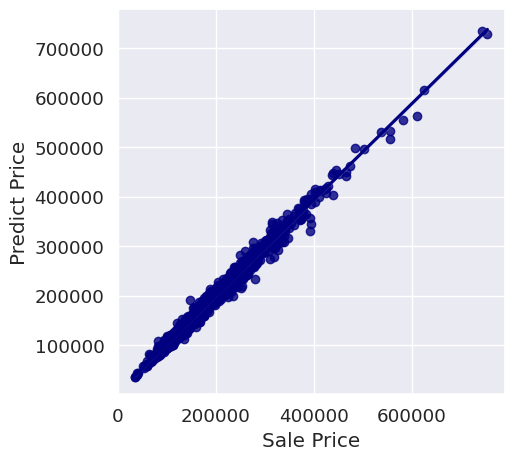

In [30]:
result = pd.DataFrame({
    'Predict Price' : np.expm1(ctbr_train_pred),
    'Sale Price' : np.expm1(y_train)
})

f, ax = plt.subplots(figsize=(5,5))
sns.regplot(x = 'Sale Price', y = 'Predict Price', color = 'navy', data = result)
plt.show()

In [41]:
submission = pd.DataFrame({
    'Id' : test_ID,
    'SalePrice' : ctbr_pred
}) 

print(submission.head())
submission.to_csv('final_submission.csv', index = False)

     Id  SalePrice
0  1461 124855.361
1  1462 160967.783
2  1463 189019.462
3  1464 196606.352
4  1465 184046.873


## Stacking method

In [33]:
meta_model = CatBoostRegressor(iterations = 6000,
                               learning_rate = 0.01,
                               max_depth = 4,
                               l2_leaf_reg = 1,
                               eval_metric = 'RMSE',
                               random_seed = 7,
                               silent = True)

stacking_model = StackingCVRegressor(regressors=(gbr,xgbr, ctbr, lgbm, rfr),
                                      meta_regressor=meta_model,
                                      use_features_in_secondary=True)

In [20]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1).get_n_splits(train.values)
stacking_model_mse_cv_scores = - cross_val_score(stacking_model, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
stacking_model_rmse_score = np.sqrt(stacking_model_mse_cv_scores)

print('Stacking_model Regressor CV RMSE Score :', stacking_model_rmse_score.mean())

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] baggi

In [35]:
stacking_model_fit = stacking_model.fit(train,y_train)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] baggi

In [36]:
stacking_model_train_pred = stacking_model_fit.predict(train)
stacking_model_pred = np.expm1(stacking_model_fit.predict(test))
rmse_stacking_model = np.sqrt(mean_squared_error(y_train,stacking_model_train_pred))
print(rmse_stacking_model)

0.038436736107244365


In [37]:
submission2 = pd.DataFrame({
    'Id' : test_ID,
    'SalePrice' : stacking_model_pred
}) 

print(submission2.head())
submission2.to_csv('final_submission2.csv', index = False)

     Id  SalePrice
0  1461 123343.571
1  1462 162451.321
2  1463 190722.789
3  1464 196574.702
4  1465 182549.813


In [45]:
def blend_predictions(X):
        return ((0.1 * gbr.predict(X)) + \
            (0.1 * xgbr.predict(X)) + \
            (0.2 * ctbr.predict(X)) + \
            (0.2 * lgbm.predict(X)) + \
            (0.10 * rfr.predict(X)) + \
            (0.3 * stacking_model_fit.predict(np.array(X))))

In [46]:
# Get final precitions from the blended model
blend_model_train_pred = blend_predictions(train)
blend_model_pred = np.expm1(blend_predictions(test))
rmse_blend_model = np.sqrt(mean_squared_error(y_train,blend_model_train_pred))
print(rmse_blend_model)


0.04971097848824676


In [47]:
submission3 = pd.DataFrame({
    'Id' : test_ID,
    'SalePrice' : blend_model_pred
}) 

print(submission3.head())
submission3.to_csv('final_submission3.csv', index = False)

     Id  SalePrice
0  1461 123997.616
1  1462 159541.632
2  1463 185714.862
3  1464 193069.637
4  1465 188376.806
